In [ ]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline
import plotly.express as px

In [ ]:
##Read data and convert invoicedate column from string to date/time 
df = pd.read_excel('Online_Retail.xlsx', parse_dates= ['InvoiceDate'])

In [ ]:
##Check first 10 row data frame
df.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom


In [ ]:
##Check last 10 row data frame
df.tail(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541899,581587,22726,ALARM CLOCK BAKELIKE GREEN,4,2011-12-09 12:50:00,3.75,12680.0,France
541900,581587,22730,ALARM CLOCK BAKELIKE IVORY,4,2011-12-09 12:50:00,3.75,12680.0,France
541901,581587,22367,CHILDRENS APRON SPACEBOY DESIGN,8,2011-12-09 12:50:00,1.95,12680.0,France
541902,581587,22629,SPACEBOY LUNCH BOX,12,2011-12-09 12:50:00,1.95,12680.0,France
541903,581587,23256,CHILDRENS CUTLERY SPACEBOY,4,2011-12-09 12:50:00,4.15,12680.0,France
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


In [ ]:
##check data type and null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [ ]:
##Make total price columns
df['Totalprice'] = df['Quantity'] * df['UnitPrice']

**Data Cleanning**

From the primary data information. we can saw the null values from Description and CustomerID. Let's drop it all from data set.

In [ ]:
##Drop all nan values in customer id
df.dropna(subset= ['CustomerID'], inplace= True)

In [ ]:
##Make sure that all nan values got rid
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      406829 non-null  object        
 8   Totalprice   406829 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 31.0+ MB


In [ ]:
##Display statistics numerical data
df.describe()

,Quantity,UnitPrice,CustomerID,Totalprice
count,406829.000000,406829.000000,406829.000000,406829.000000
mean,12.061303,3.460471,15287.690570,20.401854
std,248.693370,69.315162,1713.600303,427.591718
min,-80995.000000,0.000000,12346.000000,-168469.600000
25%,2.000000,1.250000,13953.000000,4.200000
50%,5.000000,1.950000,15152.000000,11.100000
75%,12.000000,3.750000,16791.000000,19.500000
max,80995.000000,38970.000000,18287.000000,168469.600000


From the statistics numerical data  the quantity and totalprice columns have some outlier. After we checked it made us know those values are values from void transaction. Let's get rid of it from dataframe.

In [ ]:
df[df['Totalprice'] < 0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Totalprice
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom,-27.50
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom,-4.65
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom,-19.80
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,-6.96
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,-6.96
...,...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom,-9.13
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom,-224.69
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom,-54.75
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom,-1.25


In [ ]:
##Recheck the outlier are disappear from our dataframe
df.describe()

,Quantity,UnitPrice,CustomerID,Totalprice
count,397884.000000,397884.000000,397884.000000,397884.000000
mean,12.988238,3.116488,15294.423453,22.397000
std,179.331775,22.097877,1713.141560,309.071041
min,1.000000,0.001000,12346.000000,0.001000
25%,2.000000,1.250000,13969.000000,4.680000
50%,6.000000,1.950000,15159.000000,11.800000
75%,12.000000,3.750000,16795.000000,19.800000
max,80995.000000,8142.750000,18287.000000,168469.600000


**Exploratory Data Analysis**

In [ ]:
df.sample(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Totalprice
465983,576274,22274,FELTCRAFT DOLL EMILY,1,2011-11-14 14:24:00,2.95,17793.0,United Kingdom,2.95
434150,574033,23543,WALL ART KEEP CALM,2,2011-11-02 12:44:00,8.25,16558.0,United Kingdom,16.50
293484,562602,23138,SINGLE WIRE HOOK IVORY HEART,12,2011-08-08 10:11:00,1.45,12865.0,Austria,17.40
296333,562886,22998,TRAVEL CARD WALLET KEEP CALM,48,2011-08-10 11:41:00,0.42,17994.0,United Kingdom,20.16
313041,564434,84406B,CREAM CUPID HEARTS COAT HANGER,32,2011-08-25 11:59:00,3.75,14687.0,United Kingdom,120.00
438097,574304,22424,ENAMEL BREAD BIN CREAM,1,2011-11-03 16:30:00,12.75,14428.0,United Kingdom,12.75
335554,566290,23300,GARDENERS KNEELING PAD CUP OF TEA,1,2011-09-11 15:24:00,1.65,14456.0,United Kingdom,1.65
503644,578931,23323,WHITE WICKER STAR,1,2011-11-27 12:40:00,2.10,16942.0,United Kingdom,2.10
395531,571036,21231,SWEETHEART CERAMIC TRINKET BOX,12,2011-10-13 12:52:00,1.25,17567.0,United Kingdom,15.00
59022,541268,21908,CHOCOLATE THIS WAY METAL SIGN,2,2011-01-17 10:52:00,2.10,12872.0,United Kingdom,4.20


**How many customer they have ?**

In [ ]:
df['CustomerID'].nunique()

4338


**How many countries are there customers from?**

In [ ]:
df['Country'].nunique()

37

**Display top 10 countries which made most income**

In [ ]:
top_10 = df.groupby(['Country']).sum().sort_values(by= 'Totalprice', ascending= False).head(10)
top_10['Totalprice'] = top_10.astype('int')
top_10

,Quantity,UnitPrice,CustomerID,Totalprice
Country,,,,
United Kingdom,4256740,1.050205e+06,5.510573e+09,4256740
Netherlands,200361,6.247730e+03,3.402037e+07,200361
EIRE,140275,3.217928e+04,1.066949e+08,140275
Germany,119261,3.353214e+04,1.143471e+08,119261
France,111471,3.683204e+04,1.057506e+08,111471
Australia,83901,3.612500e+03,1.472127e+07,83901
Spain,27940,9.504340e+03,3.206777e+07,27940
Switzerland,30082,6.389270e+03,2.331229e+07,30082
Belgium,23237,7.372850e+03,2.524670e+07,23237


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


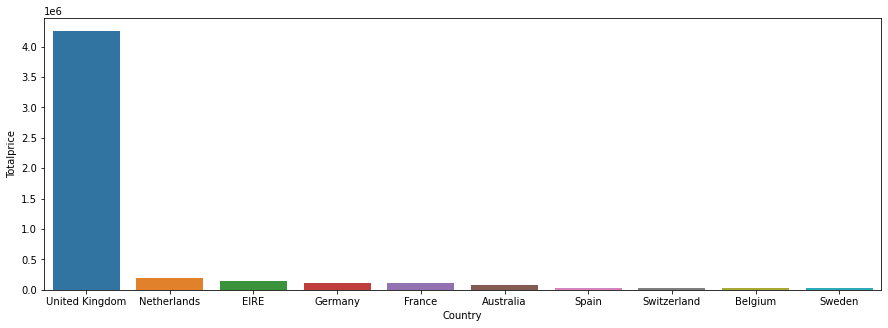

In [ ]:
fig = plt.figure(figsize=(15, 5))
sns.barplot(top_10.index, top_10['Totalprice'])

**Display top 10 products which made most income**

In [ ]:
top_pro = df.groupby(['Description']).sum()[['Totalprice']].sort_values(
           by= 'Totalprice', ascending= False).head(10)
top_pro

,Totalprice
Description,
"PAPER CRAFT , LITTLE BIRDIE",168469.60
REGENCY CAKESTAND 3 TIER,142592.95
WHITE HANGING HEART T-LIGHT HOLDER,100448.15
JUMBO BAG RED RETROSPOT,85220.78
MEDIUM CERAMIC TOP STORAGE JAR,81416.73
POSTAGE,77803.96
PARTY BUNTING,68844.33
ASSORTED COLOUR BIRD ORNAMENT,56580.34
Manual,53779.93


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

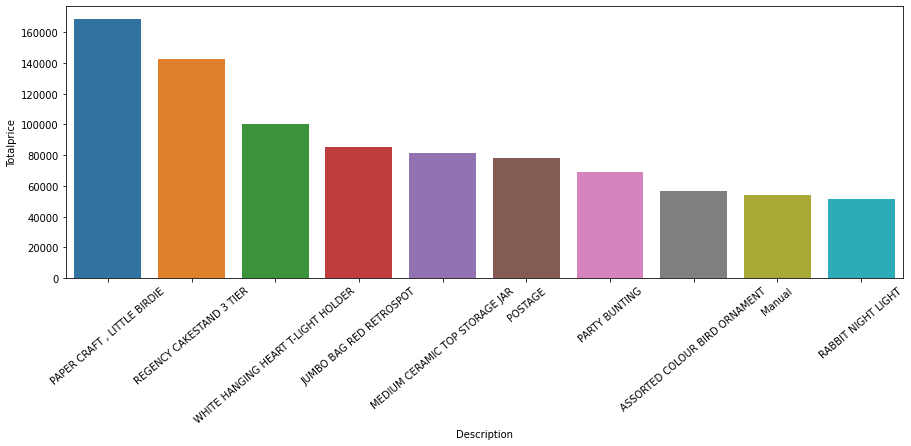

In [ ]:
fig = plt.figure(figsize=(15, 5))
sns.barplot(top_pro.index, top_pro['Totalprice'])
plt.xticks(rotation= 40)

**Display top 10 products which made most orders**

In [ ]:
top_ord = df.groupby(['Description']).sum()[['Quantity']].sort_values(
           by= 'Quantity', ascending= False).head(10)
top_ord

,Quantity
Description,
"PAPER CRAFT , LITTLE BIRDIE",80995
MEDIUM CERAMIC TOP STORAGE JAR,77916
WORLD WAR 2 GLIDERS ASSTD DESIGNS,54415
JUMBO BAG RED RETROSPOT,46181
WHITE HANGING HEART T-LIGHT HOLDER,36725
ASSORTED COLOUR BIRD ORNAMENT,35362
PACK OF 72 RETROSPOT CAKE CASES,33693
POPCORN HOLDER,30931
RABBIT NIGHT LIGHT,27202


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

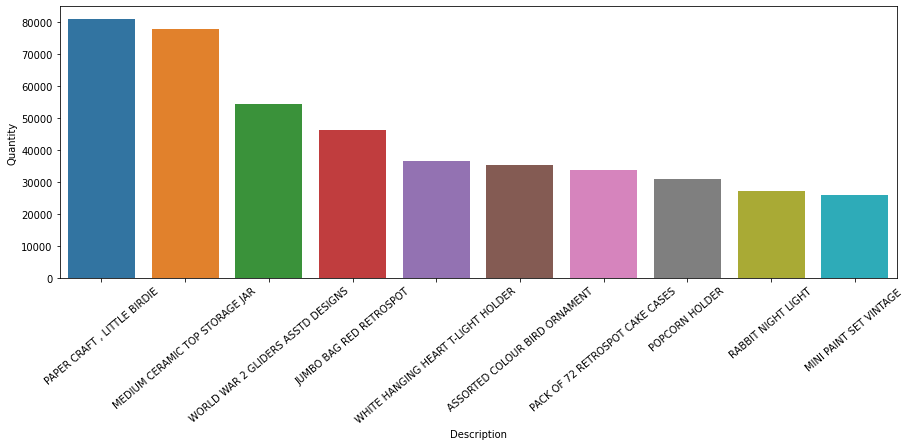

In [ ]:
fig = plt.figure(figsize=(15, 5))
sns.barplot(top_ord.index, top_ord['Quantity'])
plt.xticks(rotation= 40)

**Display top 10 spender**

In [ ]:
top_spen = df.groupby(['CustomerID', 'Country']).sum()[['Totalprice']].reset_index().sort_values(
           by= 'Totalprice', ascending= False).head(10)
top_spen

,CustomerID,Country,Totalprice
1697,14646.0,Netherlands,280206.02
4209,18102.0,United Kingdom,259657.30
3736,17450.0,United Kingdom,194550.79
3016,16446.0,United Kingdom,168472.50
1887,14911.0,EIRE,143825.06
57,12415.0,Australia,124914.53
1341,14156.0,EIRE,117379.63
3779,17511.0,United Kingdom,91062.38
2710,16029.0,United Kingdom,81024.84
0,12346.0,United Kingdom,77183.60


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

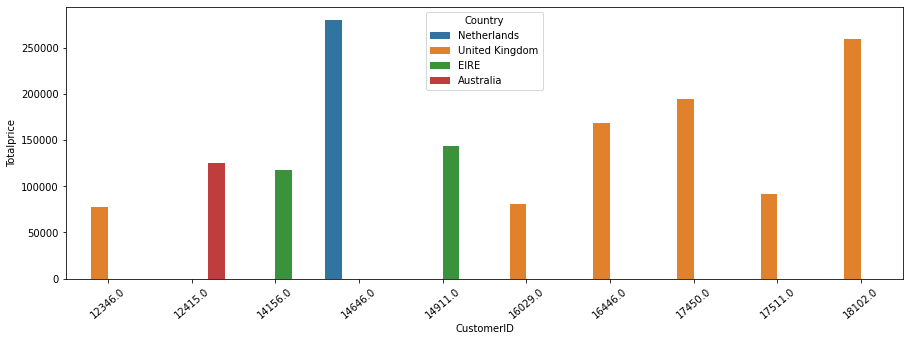

In [ ]:
fig = plt.figure(figsize=(15, 5))
sns.barplot(top_spen['CustomerID'], top_spen['Totalprice'], 
            hue= top_spen['Country'])
plt.xticks(rotation= 40)

In [ ]:
top_spender = df[df['CustomerID'] == 14646]
top_spender['Day of Week'].value_counts()

Thu    624
Tue    504
Wed    312
Mon    298
Fri    286
Sun     52
Name: Day of Week, dtype: int64

In [ ]:
##Create new feature 
df['Hour'] = df['InvoiceDate'].apply(lambda time: time.hour)
df['Month'] = df['InvoiceDate'].apply(lambda time: time.month)
df['Day of Week'] = df['InvoiceDate'].apply(lambda time: time.dayofweek)
df['Day'] = df['InvoiceDate'].apply(lambda time: time.day)
df['Year'] = df['InvoiceDate'].apply(lambda time: time.year)

In [ ]:
 ##map from day number to day name 
 df['Day of Week'] = df['Day of Week'].map({0:'Mon', 1:'Tue', 2:'Wed', 3:'Thu',
                                           4:'Fri', 5:'Sat', 6:'Sun'})
df.sample(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Totalprice,Hour,Month,Day of Week,Year,Day
246365,558700,20728,LUNCH BAG CARS BLUE,10,2011-07-01 12:33:00,1.65,17920.0,United Kingdom,16.50,12,7,Fri,2011,1
158573,550299,22767,TRIPLE PHOTO FRAME CORNICE,6,2011-04-15 16:46:00,9.95,17389.0,United Kingdom,59.70,16,4,Fri,2011,15
428470,573452,22728,ALARM CLOCK BAKELIKE PINK,160,2011-10-31 10:45:00,4.08,17450.0,United Kingdom,652.80,10,10,Mon,2011,31
484307,577530,22767,TRIPLE PHOTO FRAME CORNICE,2,2011-11-20 13:48:00,9.95,14950.0,United Kingdom,19.90,13,11,Sun,2011,20
493731,578248,82494L,WOODEN FRAME ANTIQUE WHITE,6,2011-11-23 12:40:00,2.95,16255.0,United Kingdom,17.70,12,11,Wed,2011,23
287604,562112,23236,DOILEY STORAGE TIN,6,2011-08-02 15:53:00,2.89,18236.0,United Kingdom,17.34,15,8,Tue,2011,2
34012,539314,21114,LAVENDER SCENTED FABRIC HEART,20,2010-12-16 18:20:00,1.25,13874.0,United Kingdom,25.00,18,12,Thu,2010,16
14555,537604,21534,DAIRY MAID LARGE MILK JUG,3,2010-12-07 13:01:00,4.95,13488.0,United Kingdom,14.85,13,12,Tue,2010,7
236977,557793,22426,ENAMEL WASH BOWL CREAM,1,2011-06-22 17:30:00,3.75,14998.0,United Kingdom,3.75,17,6,Wed,2011,22
492144,578092,22338,STAR DECORATION PAINTED ZINC,96,2011-11-22 17:19:00,0.19,16811.0,United Kingdom,18.24,17,11,Tue,2011,22


**Display revenue for each month**

In [ ]:
##Create year revenur report
year_rep = df[df['Year'] == 2011].groupby(['Month']).sum()[['Totalprice']]

In [ ]:
px.line(x= year_rep.index, y= year_rep['Totalprice'], title= '2011 Revenue for each month', 
        labels= {'x': 'Month', 'y': 'Revenue'})

**Which day of the week had the most users?**

In [ ]:
day_cus = df.groupby(['CustomerID', 'Day of Week']).count().reset_index()
day_cus

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0, 0.5, 'Number of customer')

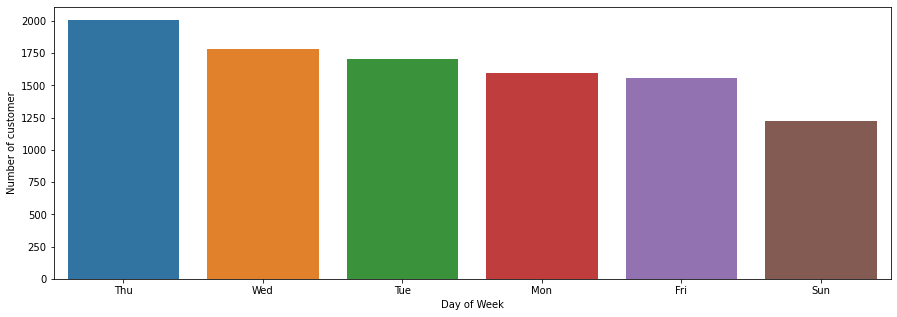

In [ ]:
fig = plt.figure(figsize=(15, 5))
sns.countplot(day_cus['Day of Week'], 
              order= day_cus['Day of Week'].value_counts().index)
plt.ylabel('Number of customer')

**What time of the day had most users?**

In [ ]:
hour_cus = df.groupby(['CustomerID', 'Hour']).count().reset_index()
hour_cus

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0, 0.5, 'Number of customer')

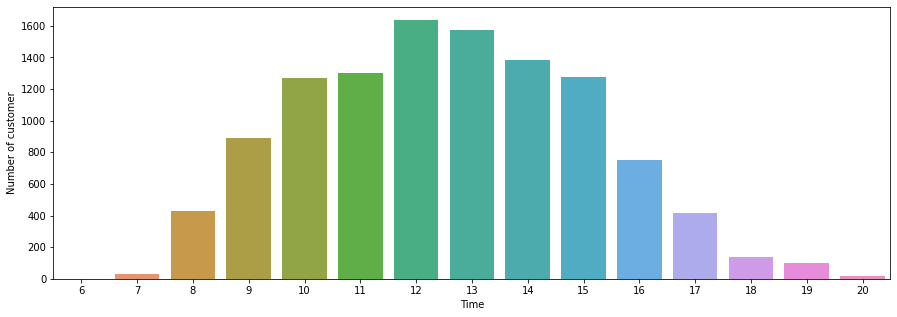

In [ ]:
fig = plt.figure(figsize=(15, 5))
sns.countplot(hour_cus['Hour'])
plt.xlabel('Time')
plt.ylabel('Number of customer')

**Observe customer behavior in which time of day has the most users?**

In [ ]:
groupping = df.groupby(['Day of Week', 'Hour'])
day_h = groupping.nunique()['CustomerID'].reset_index()
day_h = day_h.pivot(index= 'Day of Week', columns= 'Hour', values= 'CustomerID')
day_h = day_h.fillna(0)

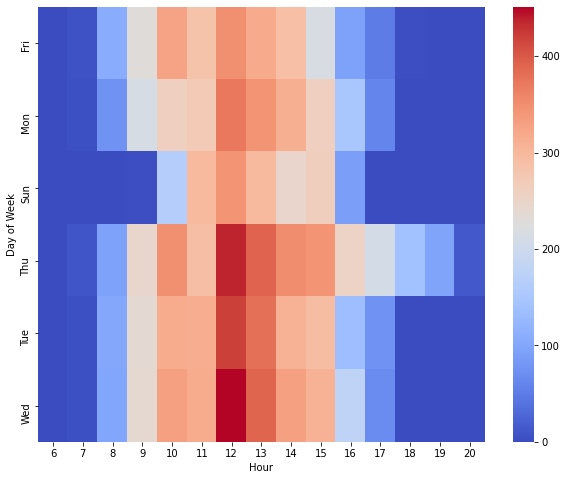

In [ ]:
fig = plt.figure(figsize=(10, 8))
sns.heatmap(day_h, cmap= 'coolwarm')

In [228]:
df['Description'].value_counts()

WHITE HANGING HEART T-LIGHT HOLDER     2028
REGENCY CAKESTAND 3 TIER               1723
JUMBO BAG RED RETROSPOT                1618
ASSORTED COLOUR BIRD ORNAMENT          1408
PARTY BUNTING                          1396
                                       ... 
PEG BAG APPLE DESIGN                      1
PINK CHERRY LIGHTS                        1
GLASS BEAD HOOP NECKLACE BLACK            1
 TOADSTOOL BEDSIDE LIGHT                  1
NEW BAROQUE LARGE NECKLACE BLK/WHIT       1
Name: Description, Length: 3877, dtype: int64

**Conclusion**


*   Almost income and users are from united kingdom
*   PAPER CRAFT , LITTLE BIRDIE  is the product which made most order and income
*   Although the main customer groups are in England but our top spender customer is in Netherlands
*   In 2011, the highest income is November
*   Wednesday and Thursday are become with the highest users
*   12pm-13pm are the time with most customers
*   It's seem like no service for Saturday







